<a href="https://colab.research.google.com/github/Al3jandraMtz/Proyecto4_DataLab/blob/main/P4_RiesgoRelativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Riesgo Relativo

## Categoría de Descuento vs Categoría de Calificación

In [ ]:
import numpy as np

# Calcular con el percentil 75 para "High Discount" en discount_percentage
discount_threshold = np.percentile(df['discount_percentage'], 75)

print(f"Umbral definido para alto descuento (percentil 75): {discount_threshold:.2f}")

# Definir el umbral de calificación
rating_threshold =

# Crear las categorías usando el nuevo umbral
df['high_discount'] = df['discount_percentage'] > discount_threshold
df['low_rating'] = df['adjusted_rating'] < rating_threshold

# Verificar cuántos productos hay en cada categoría
high_discount_count = df['high_discount'].sum()
low_discount_count = (~df['high_discount']).sum()

print(f"Productos con alto descuento: {high_discount_count}")
print(f"Productos con bajo/sin descuento: {low_discount_count}")

# Calcular el riesgo en cada grupo
risk_high_discount = df[df['high_discount']]['low_rating'].mean()
risk_low_discount = df[~df['high_discount']]['low_rating'].mean()

print(f"Riesgo en productos con alto descuento: {risk_high_discount}")
print(f"Riesgo en productos con bajo/sin descuento: {risk_low_discount}")

# Evitar la división por cero
if risk_low_discount != 0:
    risk_relative = risk_high_discount / risk_low_discount
    print(f"El riesgo relativo de tener una calificación baja con un alto descuento es: {risk_relative:.2f}")
else:
    print("No se puede calcular el riesgo relativo porque el riesgo en productos con bajo/sin descuento es 0.")


Umbral definido para alto descuento (percentil 75): 0.62
Productos con alto descuento: 335
Productos con bajo/sin descuento: 1016
Riesgo en productos con alto descuento: 0.008955223880597015
Riesgo en productos con bajo/sin descuento: 0.002952755905511811
El riesgo relativo de tener una calificación baja con un alto descuento es: 3.03


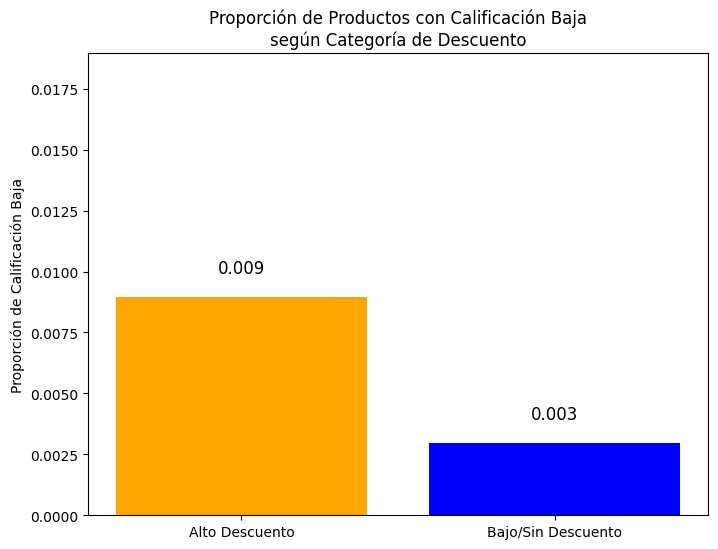

In [ ]:
#Gráfica de barras
import matplotlib.pyplot as plt

# Proporciones de productos con calificación baja en cada grupo
proportions = [risk_high_discount, risk_low_discount]
labels = ['Alto Descuento', 'Bajo/Sin Descuento']

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, proportions, color=['orange', 'blue'])

# Añadir detalles a la gráfica
plt.title('Proporción de Productos con Calificación Baja\nsegún Categoría de Descuento')
plt.ylabel('Proporción de Calificación Baja')
plt.ylim(0, max(proportions) + 0.01)  # Ajustar el límite del eje Y para mejor visualización

# Mostrar valores en las barras
for i, v in enumerate(proportions):
    plt.text(i, v + 0.001, f'{v:.3f}', ha='center', fontsize=12)

plt.show()


# 2.

In [ ]:
import pandas as pd

# Definir calificación alta
high_rating_threshold = 4

# Crear la categoría de calificación alta
df['high_rating'] = df['adjusted_rating'] >= high_rating_threshold

# Agrupar por categoría de producto y calcular la proporción de calificaciones altas
category_risk = df.groupby('category_1')['high_rating'].mean().reset_index()

# Renombrar columna para claridad
category_risk.rename(columns={'high_rating': 'risk_high_rating'}, inplace=True)

# Filtrar las categorías válidas (sin NaN ni inf)
filtered_category_risk = category_risk[category_risk['risk_high_rating'] > 0]

# Seleccionar la categoría de referencia (con menor riesgo)
reference_risk = filtered_category_risk['risk_high_rating'].min()

# Calcular el riesgo relativo para cada categoría
filtered_category_risk['relative_risk'] = filtered_category_risk['risk_high_rating'] / reference_risk

# Mostrar los resultados
print(filtered_category_risk)


              category_1  risk_high_rating  relative_risk
1  Computers&Accessories          0.824000       1.648000
2            Electronics          0.738776       1.477551
3    Health&PersonalCare          1.000000       2.000000
4           Home&Kitchen          0.676339       1.352679
5        HomeImprovement          1.000000       2.000000
6     MusicalInstruments          0.500000       1.000000
7         OfficeProducts          1.000000       2.000000
8             Toys&Games          1.000000       2.000000


<ipython-input-29-b0e1770f6826>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_category_risk['relative_risk'] = filtered_category_risk['risk_high_rating'] / reference_risk


# 3.

In [5]:
import pandas as pd

df = pd.read_csv('/content/Data-Set-Sentimiento1.csv')

# Definir calificación baja
low_rating_threshold = 3

# Crear la categoría de calificación baja
df['low_rating'] = df['adjusted_rating'] < low_rating_threshold

# Lista de palabras negativas que identificaste
negative_words = ["problem", "low", "bad", "hard", "stopped", "poor", "difficult", "lag", "damaged", "disappointed", "loose", "defective", "cut", "damage", "lower", "disappointed", "defective"]

# Crear una columna que indique si la reseña contiene alguna de estas palabras negativas
df['contains_negative'] = df['cleaned_review_content'].apply(lambda x: any(word in x for word in negative_words))

# Calcular la proporción de calificaciones bajas para reseñas que contienen palabras negativas
risk_with_negative = df[df['contains_negative']]['low_rating'].mean()

# Calcular la proporción de calificaciones bajas para reseñas que no contienen palabras negativas
risk_without_negative = df[~df['contains_negative']]['low_rating'].mean()

# Calcular el riesgo relativo
risk_relative = risk_with_negative / risk_without_negative

# Mostrar los resultados
print(f"Riesgo de calificación baja con palabras negativas: {risk_with_negative:.2f}")
print(f"Riesgo de calificación baja sin palabras negativas: {risk_without_negative:.2f}")
print(f"Riesgo relativo de calificación baja según palabras negativas: {risk_relative:.2f}")


Riesgo de calificación baja con palabras negativas: 0.00
Riesgo de calificación baja sin palabras negativas: 0.00
Riesgo relativo de calificación baja según palabras negativas: 0.94
